In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB  # Instead you can use other ml classifier as well

In [3]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer , PorterStemmer
from nltk.corpus import wordnet  # Actual database along with functionality

In [4]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reliance\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reliance\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\reliance\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
df = pd.read_csv("bbc-text.csv")
# Actually this is the news dataset and in this dataset they provide category of the news and the 
# actual news related to that category
# We are going to classify the news

In [6]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [8]:
# Seperating the classes
X = df['text']
y= df['category']

<AxesSubplot:>

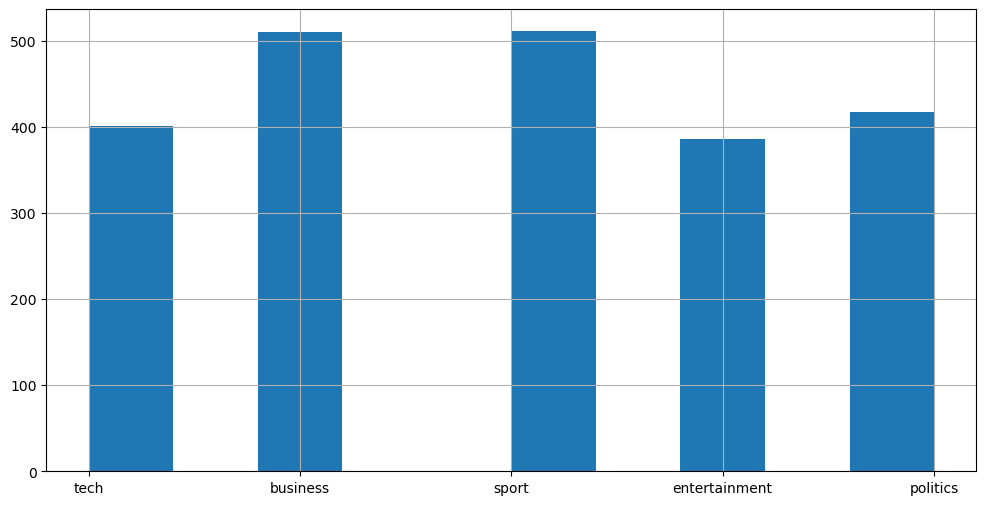

In [9]:
# Checking the labels are imbalanced or not
y.hist(figsize=(12,6))

In [10]:
# Data is already balanced as well spread out(means particularly one class does not contain more values
# in the datset)

In [11]:
 Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
vectorizer = CountVectorizer()

In [13]:
X_train = vectorizer.fit_transform(Xtrain)
X_test = vectorizer.transform(Xtest)
# Using above command we just converted text values dataset into metrics(sparse metrics rahega)

In [14]:
X_train

<1780x26879 sparse matrix of type '<class 'numpy.int64'>'
	with 359676 stored elements in Compressed Sparse Row format>

In [15]:
# Lets Check out how much % of the data contains non zero values
(X_train !=0).sum()

359676

In [16]:
# So total number of non zero values/total values in dataset
(X_train !=0).sum() / np.prod(X_train.shape)

0.007517585049269908

In [17]:
# We can consider that 1% of the data is non-zero

**Building Model**

In [18]:
model = MultinomialNB()
model.fit(X_train , y_train)

MultinomialNB()

In [19]:
print("ACcuracy training: ",model.score(X_train , y_train))
print("Accuracy testing: ",model.score(X_test , y_test))

ACcuracy training:  0.9932584269662922
Accuracy testing:  0.9752808988764045


In [20]:
# Although its working pretty GOOD 
# But lets try out the increase the accuracy

In [21]:
vectorizer = CountVectorizer(stop_words="english")
X_train = vectorizer.fit_transform(Xtrain)
X_test = vectorizer.transform(Xtest)
model = MultinomialNB()
model.fit(X_train,y_train)
print("Accuracy training: ",model.score(X_train,y_train))
print("Accuracy testing: ",model.score(X_test,y_test))

Accuracy training:  0.9932584269662922
Accuracy testing:  0.9775280898876404


In [22]:
feature_names = vectorizer.get_feature_names()

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
print(feature_names)

['00', '000', '000bn', '000m', '000s', '000th', '001', '001and', '001st', '004', '0051', '007', '01', '0100', '011', '0130', '02', '0227', '028', '03', '0300', '033', '037', '03bn', '04', '0400', '041', '04bn', '04m', '04secs', '05', '050', '050505', '0530', '0530gmt', '056', '05bn', '05m', '06', '0619', '0630', '069', '06bn', '07', '070', '0700', '0710', '072', '07bn', '08', '080', '0800', '081', '0845', '0870', '088', '08bn', '09', '0900', '093', '09bn', '09secs', '10', '100', '1000', '1000m', '1000th', '100bn', '100m', '100ml', '100s', '101', '102', '102m', '103', '1030', '103m', '104', '104m', '105', '105bn', '105m', '106', '106cm', '106m', '107', '108', '1080', '109', '109m', '10bn', '10cm', '10km', '10m', '10s', '10secs', '10th', '11', '110', '1100', '110m', '111', '111m', '112', '113', '1130', '1130p', '113bn', '113th', '114', '115', '116', '116i', '117', '118', '118m', '119', '119bn', '119m', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '1200m', '120bn', '120gb', '120m',

In [24]:
# Performing Lemmatization
def get_wordnet_tag(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
class Lemmatokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word,pos=get_wordnet_tag(tag)) for word,tag in words_and_tags]

In [26]:
vectorizer = CountVectorizer(tokenizer=Lemmatokenizer())
X_train = vectorizer.fit_transform(Xtrain)
X_test = vectorizer.transform(Xtest)

model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy score trian: ",model.score(X_train,y_train))
print("Accuracy score test: ",model.score(X_test,y_test))

Accuracy score trian:  0.9932584269662922
Accuracy score test:  0.9752808988764045


In [29]:
# Stemming
class Stemtokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(word) for word in tokens]

In [30]:
vectorizer = CountVectorizer(tokenizer=Stemtokenizer())
X_train = vectorizer.fit_transform(Xtrain)
X_test = vectorizer.transform(Xtest)

model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy score trian: ",model.score(X_train,y_train))
print("Accuracy score test: ",model.score(X_test,y_test))

Accuracy score trian:  0.9921348314606742
Accuracy score test:  0.9775280898876404


In [31]:
# Simple tokenizer
def simple_tokenizer(doc):
    return doc.split()

In [32]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
X_train = vectorizer.fit_transform(Xtrain)
X_test = vectorizer.transform(Xtest)

model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy score trian: ",model.score(X_train,y_train))
print("Accuracy score test: ",model.score(X_test,y_test))

Accuracy score trian:  0.9938202247191011
Accuracy score test:  0.9752808988764045
